In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

## 1.Gather Data

#### 1. Data of The WeRateDogs Twitter archive

In [2]:
archive= pd.read_csv("twitter-archive-enhanced.csv")
archive.tweet_id=archive.expanded_urls.str.extract('(\d{18})')

#### 2. Data of The tweet image predictions

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)

with open(url.split("/")[-1],mode="wb")as file:
    file.write(response.content)
    

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Data of Tweet_jason

In [325]:
consumer_key = '631oPzIVNa1JRQMriT37UVveY'
consumer_secret = 'C3JrAnxSfjIBMx5hM7PdJGIHtabmwcTtjuAbO3bijqiwOEPwA1'
access_token = '184932375-paJ54Ll9u2qMa9BKeNtswljlS16RcBYNBZdBs6q5'
access_secret = '0CC2ZCl9ViQJAEkVigTmakh1D0rZZf1fv1TDSp1tUsFj5'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

txt_file=open('tweet_json.txt','w')
#txt_file.write('tweet_id retweet_count favorite_count''\n')
for tweet_id in archive.tweet_id:
    try:
        tweet_info=api.get_status(str(tweet_id),tweet_mode='extended')
        retweet_count=tweet_info.retweet_count
        print(tweet_id)
        favorite_count=tweet_info.favorite_count
        txt_file.write(tweet_id+' '+str(retweet_count)+' '+str(favorite_count)+'\n')  
    except Exception as e:
        print('error')
txt_file.close()


tweet=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt','r')as file:
    for line in file:
        tweet_id,retweet_count,favorite_count=line[:-1].split(' ')
        tweet=tweet.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
887473957103951883
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
error
886258384151887873
886053434075471873
885984800019947520
885528943205470208
error
830583320585068544
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
883965650754039809
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035918850
881906580714921986


818259473185828864
818145370475810820
817902080979599361
817827839487737858
817777686764523521
817536400337801217
692417313023332352
817423860136083457
817415592588222464
815966073409433600
817171292965273600
817120970343411712
817056546584727552
790946055508652032
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
815990720817401858
732005617171337216
815990720817401858
815966073409433600
791406955684368384
815736392542261248
815639385530101762
815390420867969024
814986499976527872
814638523311648768
698195409219559425
814530161257443328
814153002265309185
790277117346975746
813910438903693312
813812741911748608
813800681631023104
813217897535406080
813202720496779264
813187593374461952
813172488309972993
813157409116065792
813142292504645637
error
813127251579564032
813112105746448384
813096984823349248
813081950185472002
813066809284972545
813051746834595840
812781120811126785
680055455951884288
812709060537683968
812503143955202048
812466

Rate limit reached. Sleeping for: 784


758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
error
758041019896193024
757741869644341248
679062614270468097
757725642876129280
757611664640446465
757597141099548672
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
679158373988876288
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
error
753655901052166144
753420520834629632
753398408988139520
753375668877008896
681523177663676416
753294487569522689
error
753026973505581056
error
752917284578922496
error
752682090207055872
752660715232722944
error
752519690950500352
752334515931054080
675354435921575936
752173152931807232
error
751937170840121344
751830394383790080
error
751598357617971201
751583847268179968
75

703041949650034688
702932127499816960
error
702684942141153280
702671118226825216
702598099714314240
702539513671897089
error
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
error
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434098688
700747788515020802
700518061187723268
700505138482569216
700462010979500032
700167517596164096
700151421916807169
700143752053182464
700062718104104960
700029284593901568
700002074055016451
699801817392291840
699788877217865730
699779630832685056
699775878809702401
699691744225525762
699446877801091073
699434518667751424
699423671849451520
699413908797464576
699370870310113280
699323444782047232
699088579889332224
699079609774645248
699072405256409088
error
699036661657767936
698989035503689728
698953797952008193
698907974262222848
698710712454139905
698703483621523456
698635131305795584
6985497

Rate limit reached. Sleeping for: 785


677187300187611136
676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
error
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
error
error
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
error
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
error
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206547968
675706639471788032
675534494439489536
6

667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667548695664070656
667548415174144001
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997374976
667188689915760640
667182792070062081
667177989038297088
667176164155375616
667174963120574464
667171260800061440
667165590075940865
667160273090

## 2. Access Data

In [381]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [203]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [375]:
archive.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [56]:
archive[archive.rating_denominator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,NaN,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [33]:
archive[archive.tweet_id.duplicated()&archive.tweet_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
150,863062471531167744,NaN,NaN,2017-05-12 16:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,NaN,NaN,NaN,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,None,None
161,860563773140209665,NaN,NaN,2017-05-05 18:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lorenzo. He's an avid nifty hat wearer an...,NaN,NaN,NaN,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,None,None,None,None


In [35]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [37]:
archive[archive.text.str.contains("Phineas")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675...,10,10,None,None,None,pupper,None
2104,670668383499735048,NaN,NaN,2015-11-28 18:19:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a magical dog. Only appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670668383...,10,10,Phineas,None,None,None,None


In [58]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [59]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [331]:
tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8361,38186
1,892177421306343426,6175,32745
2,891815181378084864,4086,24659
3,891689557279858688,8495,41506
4,891327558926688256,9199,39698


In [332]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 3 columns):
tweet_id          2181 non-null object
retweet_count     2181 non-null object
favorite_count    2181 non-null object
dtypes: object(3)
memory usage: 51.2+ KB


### Quality
####  archive table: 
      in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id should be in str type
      Timestamp,retweeted_status_timestamp is not in date type
      source has irrevalent information
      name should be all lowercase
      remove the rows without image
      tweet_id has duplicates
      text is not able to see it in full
      
####  tweet table:     
      Change the data type of retweet_count and favorite_count to int

### Tidiness
####  1. Archive table
       Dog "stage" variable in four columns: doggo, floofer, pupper, puppo  
####  2. Join 'tweet' and 'image_predictions' to 'twitter_archive'

## 3. Clean

In [340]:
archive_clean=archive.copy()
image_predictions_clean=image_predictions.copy()
tweet_clean=tweet.copy()

##### Tidiness1.Define
     create a new coloumn called Dog_stage extract the infomation of doggo, floofer, pupper, puppo from text and 
     then delete the four columns of doggo, floofer, pupper, puppo

#### Code

In [341]:
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [342]:
archive_clean=archive_clean.drop(["puppo","pupper","floofer","doggo"],axis=1)

#### Test

In [330]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Tidiness 2.Define 
    Join 'df3' and 'image_predictions' to 'twitter_archive'

#### Code


In [337]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 3 columns):
tweet_id          2181 non-null object
retweet_count     2181 non-null object
favorite_count    2181 non-null object
dtypes: object(3)
memory usage: 51.2+ KB


In [343]:
archive_clean = pd.merge(archive_clean,tweet_clean, on=['tweet_id'],how="inner")

In [344]:
image_predictions_clean["tweet_id"]=image_predictions_clean.tweet_id.astype("str")

In [345]:
archive_clean=archive_clean.merge(image_predictions_clean,on="tweet_id",how="inner")

#### Test

In [346]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 0 to 2424
Data columns (total 27 columns):
tweet_id                      2425 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2425 non-null object
source                        2425 non-null object
text                          2425 non-null object
retweeted_status_id           288 non-null float64
retweeted_status_user_id      288 non-null float64
retweeted_status_timestamp    288 non-null object
expanded_urls                 2425 non-null object
rating_numerator              2425 non-null int64
rating_denominator            2425 non-null int64
name                          2425 non-null object
dog_stage                     410 non-null object
retweet_count                 2425 non-null object
favorite_count                2425 non-null object
jpg_url                       2425 non-null object
img_num                       24

#### Quality 1.define
    change the following id data type to string
    in_reply_to_status_id
    in_reply_to_user_id
    retweeted_status_id
    retweeted_status_user_id   

#### Code

In [347]:
archive_clean['in_reply_to_status_id']=archive_clean.in_reply_to_status_id.astype("str")

In [348]:
archive_clean['in_reply_to_user_id']=archive_clean.in_reply_to_user_id.astype("str")

In [349]:
archive_clean['retweeted_status_id']=archive_clean.retweeted_status_id.astype("str")

In [350]:
archive_clean['retweeted_status_user_id']=archive_clean.retweeted_status_user_id.astype("str")

#### test

In [351]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 0 to 2424
Data columns (total 27 columns):
tweet_id                      2425 non-null object
in_reply_to_status_id         2425 non-null object
in_reply_to_user_id           2425 non-null object
timestamp                     2425 non-null object
source                        2425 non-null object
text                          2425 non-null object
retweeted_status_id           2425 non-null object
retweeted_status_user_id      2425 non-null object
retweeted_status_timestamp    288 non-null object
expanded_urls                 2425 non-null object
rating_numerator              2425 non-null int64
rating_denominator            2425 non-null int64
name                          2425 non-null object
dog_stage                     410 non-null object
retweet_count                 2425 non-null object
favorite_count                2425 non-null object
jpg_url                       2425 non-null object
img_num                       

#### Quality 2.define
     change timestamp and retweeted_status_timestamp as datetime type
    

#### Code

In [352]:
archive_clean['timestamp']=pd.to_datetime(archive_clean.timestamp)

In [353]:
archive_clean['retweeted_status_timestamp']=pd.to_datetime(archive_clean.retweeted_status_timestamp)

#### Test

In [354]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 0 to 2424
Data columns (total 27 columns):
tweet_id                      2425 non-null object
in_reply_to_status_id         2425 non-null object
in_reply_to_user_id           2425 non-null object
timestamp                     2425 non-null datetime64[ns]
source                        2425 non-null object
text                          2425 non-null object
retweeted_status_id           2425 non-null object
retweeted_status_user_id      2425 non-null object
retweeted_status_timestamp    288 non-null datetime64[ns]
expanded_urls                 2425 non-null object
rating_numerator              2425 non-null int64
rating_denominator            2425 non-null int64
name                          2425 non-null object
dog_stage                     410 non-null object
retweet_count                 2425 non-null object
favorite_count                2425 non-null object
jpg_url                       2425 non-null object
img_num       

#### Quality 3.Define
     source has irrevalent information. extract only the context information

#### Code

In [357]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2383
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      12
Name: source, dtype: int64

In [362]:
archive_clean["source"]=archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')

In [363]:
archive_clean["source"]=archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')

In [364]:
archive_clean["source"]=archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

#### Test

In [365]:
archive_clean.source.value_counts()

Twitter for iPhone    2383
Twitter Web Client      30
TweetDeck               12
Name: source, dtype: int64

#### Quality 4.Define
    name should be all lowercase

In [380]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 0 to 2424
Data columns (total 27 columns):
tweet_id                      2425 non-null object
in_reply_to_status_id         2425 non-null object
in_reply_to_user_id           2425 non-null object
timestamp                     2425 non-null datetime64[ns]
source                        2425 non-null object
text                          2425 non-null object
retweeted_status_id           2425 non-null object
retweeted_status_user_id      2425 non-null object
retweeted_status_timestamp    288 non-null datetime64[ns]
expanded_urls                 2425 non-null object
rating_numerator              2425 non-null int64
rating_denominator            2425 non-null int64
name                          2425 non-null object
dog_stage                     410 non-null object
retweet_count                 2425 non-null object
favorite_count                2425 non-null object
jpg_url                       2425 non-null object
img_num       

#### Code

In [368]:
archive_clean["name"]=archive_clean.name.str.lower()

#### Test

In [372]:
archive_clean["name"].sample(10)

952       gerald
1284     charles
486     hercules
1300        none
456       bailey
349         rory
1621        kobe
1948        none
448         none
528        wafer
Name: name, dtype: object

#### Quality 5. Define
     remove the rows without image

#### Code

In [392]:
archive_clean=archive_clean.dropna(subset=['expanded_urls'],axis=0)

#### Test

In [394]:
sum(archive_clean.expanded_urls.isnull())

0

In [395]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 0 to 2424
Data columns (total 27 columns):
tweet_id                      2425 non-null object
in_reply_to_status_id         2425 non-null object
in_reply_to_user_id           2425 non-null object
timestamp                     2425 non-null datetime64[ns]
source                        2425 non-null object
text                          2425 non-null object
retweeted_status_id           2425 non-null object
retweeted_status_user_id      2425 non-null object
retweeted_status_timestamp    288 non-null datetime64[ns]
expanded_urls                 2425 non-null object
rating_numerator              2425 non-null int64
rating_denominator            2425 non-null int64
name                          2425 non-null object
dog_stage                     410 non-null object
retweet_count                 2425 non-null object
favorite_count                2425 non-null object
jpg_url                       2425 non-null object
img_num       

#### Quality 6. Define
     Change the data type of retweet_count and favorite_count to int

#### Code

In [397]:
archive_clean.retweet_count=archive_clean.retweet_count.astype("int")

In [398]:
archive_clean.favorite_count=archive_clean.favorite_count.astype("int")

#### Test

In [399]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 0 to 2424
Data columns (total 27 columns):
tweet_id                      2425 non-null object
in_reply_to_status_id         2425 non-null object
in_reply_to_user_id           2425 non-null object
timestamp                     2425 non-null datetime64[ns]
source                        2425 non-null object
text                          2425 non-null object
retweeted_status_id           2425 non-null object
retweeted_status_user_id      2425 non-null object
retweeted_status_timestamp    288 non-null datetime64[ns]
expanded_urls                 2425 non-null object
rating_numerator              2425 non-null int64
rating_denominator            2425 non-null int64
name                          2425 non-null object
dog_stage                     410 non-null object
retweet_count                 2425 non-null int64
favorite_count                2425 non-null int64
jpg_url                       2425 non-null object
img_num         

#### Quality 7. Define
     remove tweet_id's duplicates

#### Code

In [410]:
archive_clean[archive_clean.tweet_id.duplicated()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
20,887473957103951883,nan,nan,2017-07-21 01:02:36,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,8.874739571039519e+17,4196983835.0,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,...,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
21,887473957103951883,nan,nan,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch...,nan,nan,NaT,https://twitter.com/dog_rates/status/887473957...,...,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
22,887473957103951883,nan,nan,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch...,nan,nan,NaT,https://twitter.com/dog_rates/status/887473957...,...,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
36,830583320585068544,nan,nan,2017-07-13 01:35:06,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,8.305833205850685e+17,4196983835.0,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,...,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
37,830583320585068544,nan,nan,2017-02-12 01:04:29,Twitter for iPhone,This is Lilly. She just parallel barked. Kindl...,nan,nan,NaT,https://twitter.com/dog_rates/status/830583320...,...,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [411]:
archive_clean=archive_clean.drop_duplicates(subset="tweet_id")

#### Test

In [412]:
sum(archive_clean.tweet_id.duplicated())

0

#### Quality 8. Define
     display the text in full context

#### code

In [414]:
pd.set_option('display.max_colwidth', -1)

#### test

In [416]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1176,751456908746354688,nan,nan,2016-07-08 16:44:23,Twitter for iPhone,Here's a pupper that's very hungry but too lazy to get up and eat. 12/10 (vid by @RealDavidCortes) https://t.co/lsVAMBq6ex,nan,nan,NaT,https://twitter.com/dog_rates/status/751456908746354688/video/1,...,1,golden_retriever,0.714409,True,Afghan_hound,0.066163,True,chow,0.028413,True
1650,691483041324204033,nan,nan,2016-01-25 04:49:38,Twitter for iPhone,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,nan,nan,NaT,"https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1",...,1,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True
296,842846295480000512,nan,nan,2017-03-17 21:13:10,Twitter for iPhone,This is Charlie. He's wishing you a very fun and safe St. Pawtrick's Day. 13/10 festive af https://t.co/nFpNgCWWYs,nan,nan,NaT,https://twitter.com/dog_rates/status/842846295480000512/photo/1,...,1,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True
1907,676942428000112642,nan,nan,2015-12-16 01:50:26,Twitter for iPhone,Who leaves the last cupcake just sitting there? 9/10 https://t.co/PWMqAoEx2a,nan,nan,NaT,https://twitter.com/dog_rates/status/676942428000112642/photo/1,...,1,black-footed_ferret,0.707199,False,polecat,0.154630,False,weasel,0.097626,False
221,854365224396361728,nan,nan,2017-04-18 16:05:17,Twitter for iPhone,This is Einstein. He's having a really good day. Hopes you are too. H*ckin nifty tongue. 13/10 would snug intensely https://t.co/mdaQhhfpv6,nan,nan,NaT,"https://twitter.com/dog_rates/status/854365224396361728/photo/1,https://twitter.com/dog_rates/status/854365224396361728/photo/1",...,1,Pembroke,0.907080,True,Cardigan,0.086272,True,Chihuahua,0.001413,True


## 4. Store the data

In [417]:
archive_clean.to_csv("archive_master.csv",index=False)

## 5. Analysis the data

In [418]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [420]:
archive_analysis=archive_clean[['tweet_id','timestamp','source','rating_numerator',
       'rating_denominator','name','dog_stage','retweet_count',
       'favorite_count']]

In [423]:
## add a new column of rate 
archive_analysis['rate']=archive_analysis['rating_numerator']/archive_analysis['rating_denominator']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [454]:
archive_analysis.rate.describe()

count    1993.000000
mean     1.169234   
std      4.068092   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      177.600000 
Name: rate, dtype: float64

In [455]:
## remove the outliner of 177.6
archive_analysis=archive_analysis[archive_analysis.rate!=177.600000]

In [457]:
archive_analysis.rate.describe()

count    1992.000000
mean     1.080664   
std      0.956855   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      42.000000  
Name: rate, dtype: float64

In [458]:
## remove the outliner of 42
archive_analysis=archive_analysis[archive_analysis.rate!=42]

In [459]:
archive_analysis.rate.describe()

count    1991.000000
mean     1.060112   
std      0.272407   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      7.500000   
Name: rate, dtype: float64

#### 1. I want to see the correlation maxtrix

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Correlation Matrix')

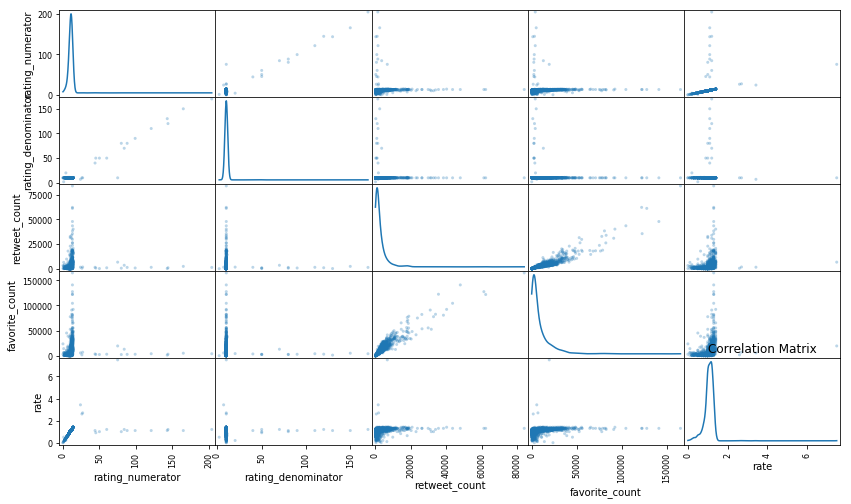

In [464]:
import matplotlib.pyplot as plt

pd.scatter_matrix(archive_analysis, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#### we can see that the retweet_count, favorite_count, and rate has strong positive relationshop

#### 2. I want to see retweet_count over time

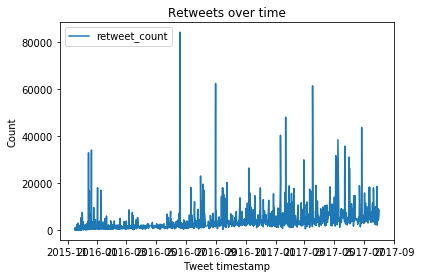

In [461]:
plt.plot(archive_analysis['timestamp'], archive_analysis['retweet_count'])
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets over time')
plt.show()

#### 3. I want to see favorite_count over time

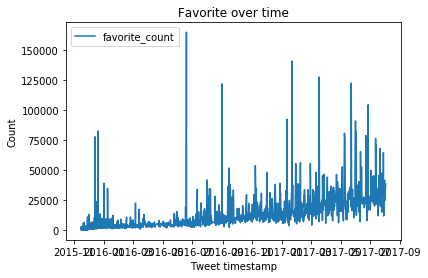

In [466]:
plt.plot(archive_analysis['timestamp'], archive_analysis['favorite_count'])
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Favorite over time')
plt.show()

#### 4. I want to see the rate over time

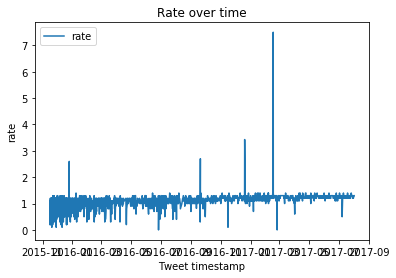

In [467]:
plt.plot(archive_analysis['timestamp'], archive_analysis['rate'])
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('rate')
plt.title('Rate over time')
plt.show()